In [4]:
import pandas as pd

df = pd.read_csv('../datafiles/cinema.csv')
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [7]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [15]:
print(df.head(8))
df2 = df.fillna(df.mean())
df2.isnull().any(axis=0)
df2.head(8)

   cinema_id   SNS1  SNS2         actor  original  sales
0       1375  291.0  1044   8808.994029         0   9731
1       1000  363.0   568  10290.709370         1  10210
2       1390  158.0   431   6340.388534         1   8227
3       1499  261.0   578   8250.485081         0   9658
4       1164  209.0   683  10908.539550         0   9286
5       1009    NaN   866   9427.214520         0   9574
6       1417  153.0   362   7237.639848         1   7869
7       1688  473.0   856           NaN         1   9804


,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.000000,1044,8808.994029,0,9731
1,1000,363.000000,568,10290.709370,1,10210
2,1390,158.000000,431,6340.388534,1,8227
3,1499,261.000000,578,8250.485081,0,9658
4,1164,209.000000,683,10908.539550,0,9286
5,1009,370.737374,866,9427.214520,0,9574
6,1417,153.000000,362,7237.639848,1,7869
7,1688,473.000000,856,9817.539306,1,9804


<Axes: xlabel='SNS2', ylabel='sales'>

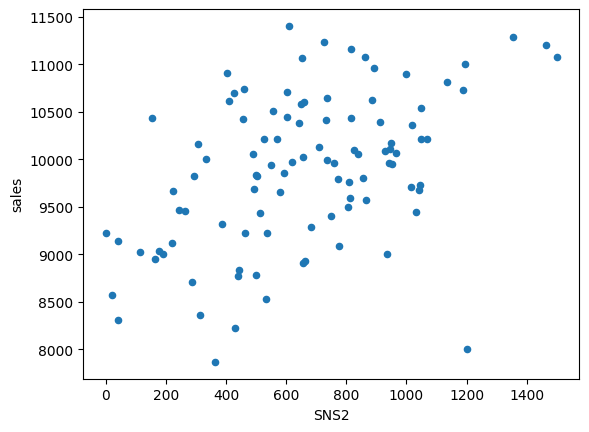

In [16]:
%matplotlib inline
df2.plot(kind='scatter',x='SNS2',y='sales')

<Axes: xlabel='original', ylabel='sales'>

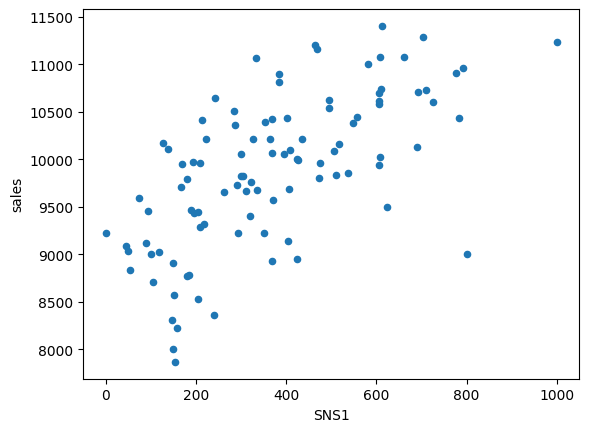

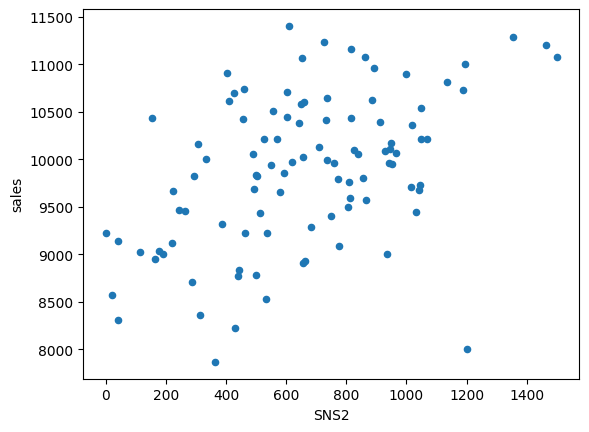

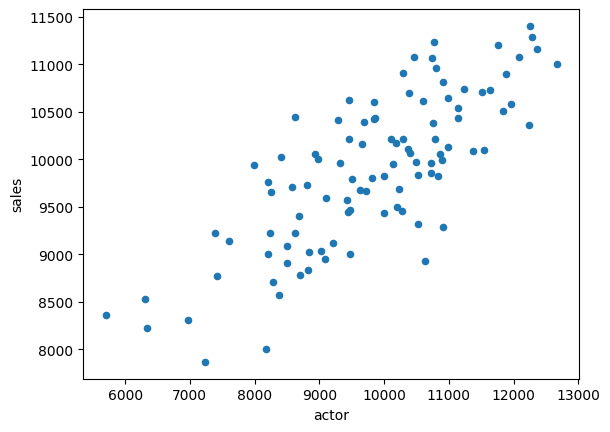

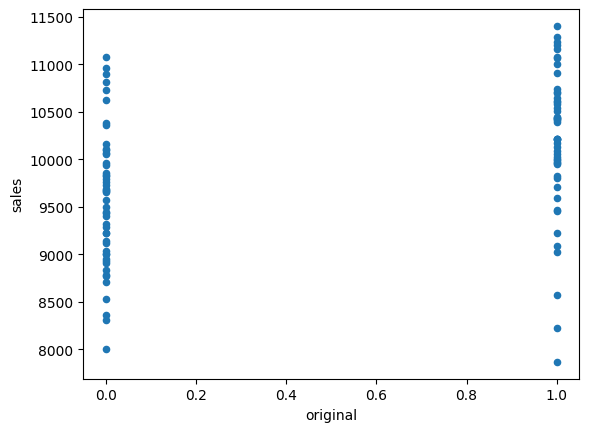

In [17]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales')
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')
df2.plot(kind = 'scatter', x = 'actor', y = 'sales')
df2.plot(kind = 'scatter', x = 'original', y = 'sales')

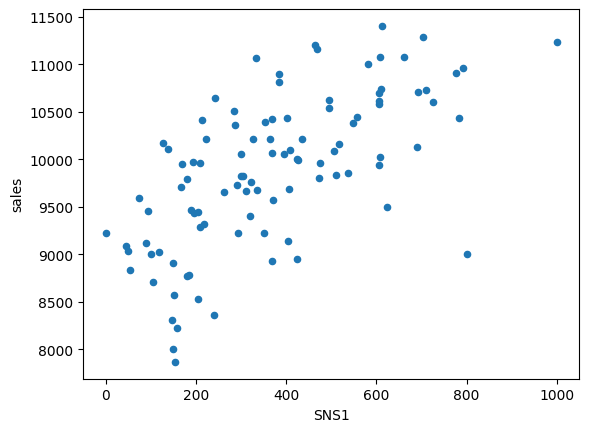

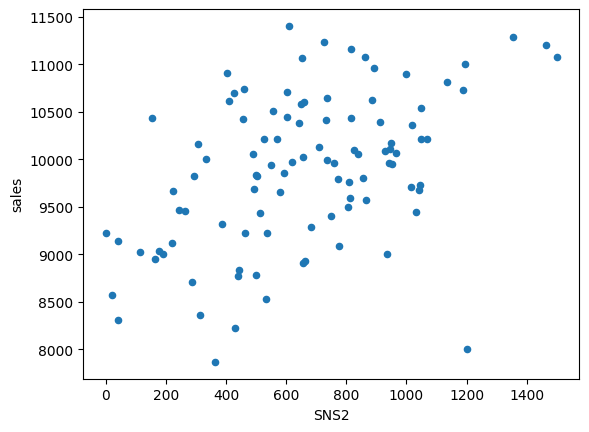

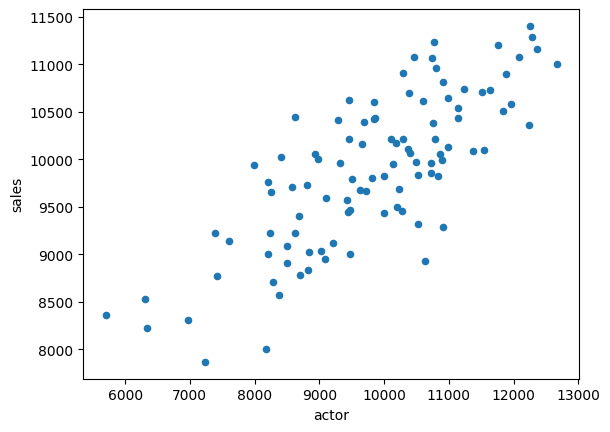

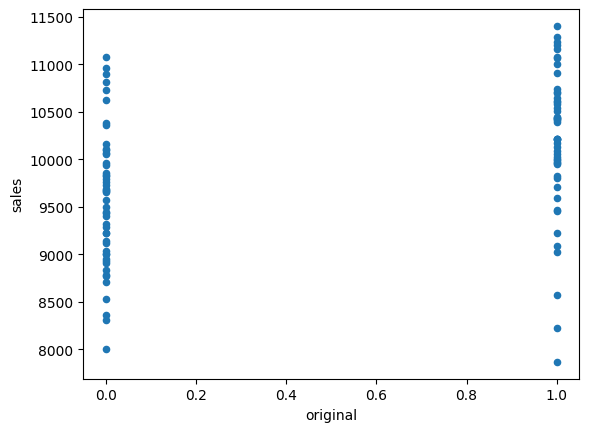

In [19]:
for name in df.columns:
    if name == 'cinema_id' or name == 'sales':
        continue
    
    df2.plot(kind="scatter",x=name,y="sales")

In [24]:
df2

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286
...,...,...,...,...,...,...
95,1260,494.0,1050,11137.482810,1,10537
96,1283,505.0,928,11376.038540,1,10084
97,1861,368.0,966,10393.252480,0,10069
98,1006,326.0,1068,9454.019853,1,10218


In [22]:
no = df2[(df2["SNS2"] > 1000) & (df['sales'] < 8500)].index
df3 = df2.drop(no,axis=0)

In [26]:
test = pd.DataFrame(
    {'Acolumn':[1,2,3],
     'Bcolumn':[4,5,6]
    }
)

In [30]:
test[test['Acolumn']<2]

,Acolumn,Bcolumn
0,1,4


In [32]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [33]:
df[(df['SNS2']>1000) & (df['sales']<8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [35]:
no = df2[(df['SNS2']>1000) & (df['sales']<8500)].index
no

Int64Index([30], dtype='int64')

In [37]:
test.drop(0,axis=0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [40]:
test.drop('Bcolumn',axis=1)

,Acolumn
0,1
1,2
2,3


In [42]:
df3 = df2.drop(no,axis=0)
df3.shape

(99, 6)

In [43]:
col = ['SNS1',"SNS2","actor","original"]
x = df3[col]

t=df3['sales']

In [47]:
df3.loc[2,"SNS1"]

158.0

In [50]:
index = [2,4,6]
col = ["SNS1",'actor']
df3.loc[index,col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [52]:
sample = [10,20,30,40]
sample[1:3]

[20, 30]

In [54]:
df3.loc[0:3,:'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [55]:
x = df3.loc[:,'SNS1':'original']
t = df3["sales"]

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [64]:
new = [[150,700,300,0]]
model.predict(new)

C:\Users\so12r\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

In [66]:
model.score(x_test,y_test)

0.790388159657009

In [67]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

mean_absolute_error(y_pred=pred,y_true=y_test)

277.12236964086253

In [69]:
import pickle

with open('cinema_v2.plk','wb') as f:
    pickle.dump(model,f)

In [71]:
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


In [72]:
import pandas as pd

df = pd.read_csv('../datafiles/ex3.csv')

In [74]:
df.head(3)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904


In [75]:
df.isnull().sum()

x0        2
x1        0
x2        2
x3        0
target    0
dtype: int64

In [76]:
df2 = df.fillna(df.median())

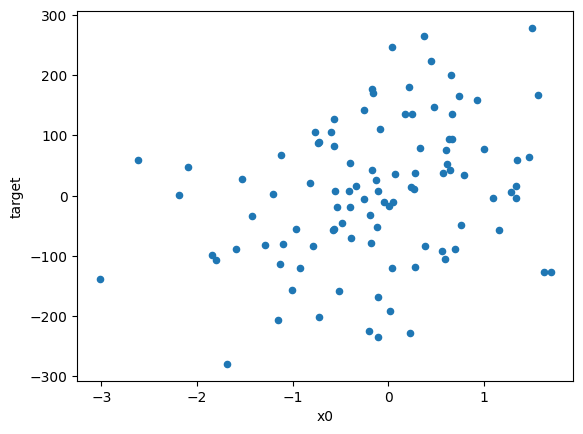

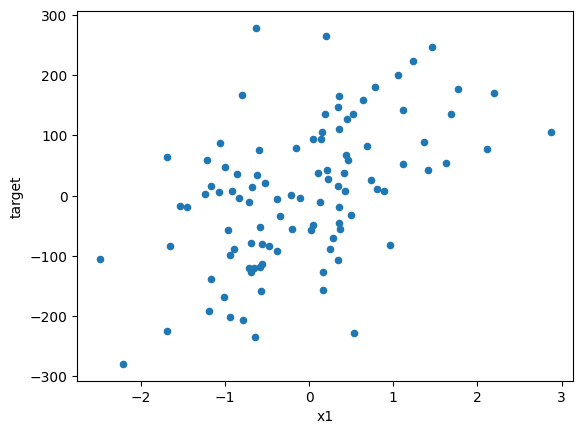

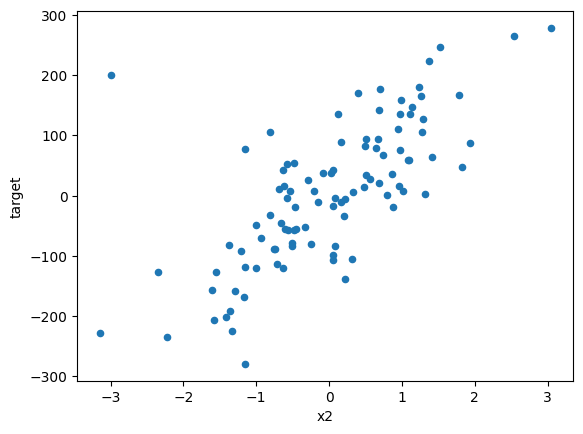

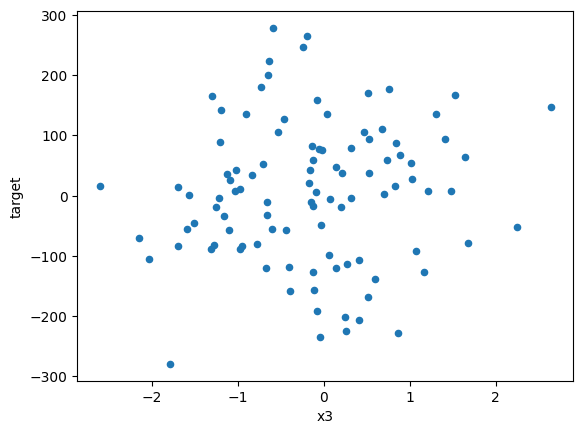

In [77]:
%matplotlib inline

for name in df.columns:
    if name == "target":
        continue
    df2.plot(kind='scatter',x=name,y='target')

In [80]:
no = df2[(df2['x2']<-2) & (df2["target"]>100)].index
print(df2)
df3 = df2.drop(no,axis=0)
print(df3)

          x0        x1        x2        x3      target
0   1.000943  2.114344 -1.148213 -0.051415   77.147293
1   1.505901 -0.626081  3.041686 -0.587336  278.595852
2  -0.390320  0.283607 -0.940359 -2.154124  -71.039904
3  -0.167273  1.413624 -0.632571 -1.016131   42.193870
4  -0.728801  1.370530  0.168298 -1.203904   89.167955
..       ...       ...       ...       ...         ...
95  1.153983 -0.963715 -0.476624 -0.444866  -56.906275
96  0.694385 -0.887651 -0.741163 -1.317783  -88.449242
97 -0.159283  2.193451  0.398708  0.514709  170.731644
98 -0.105268 -1.009562 -1.166259  0.512022 -168.092939
99 -0.043852  0.131865 -0.158939 -0.666356  -10.455471

[100 rows x 5 columns]
          x0        x1        x2        x3      target
0   1.000943  2.114344 -1.148213 -0.051415   77.147293
1   1.505901 -0.626081  3.041686 -0.587336  278.595852
2  -0.390320  0.283607 -0.940359 -2.154124  -71.039904
3  -0.167273  1.413624 -0.632571 -1.016131   42.193870
4  -0.728801  1.370530  0.168298 -1.20390

In [82]:
x = df3.loc[:,:'x3']
t = df3['target']

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,t,test_size=0.2,random_state=1)

In [86]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [87]:
model.score(x_test,y_test)

0.9820345074421969

In [89]:
import pickle

with open('ex3_v2.plk','wb') as f:
    pickle.dump(model,f)

In [91]:
print(model.coef_)
print(model.intercept_)

[32.13187579 64.54846793 87.9648651  -0.41475418]
8.93594013561169


In [92]:
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
x0,32.131876
x1,64.548468
x2,87.964865
x3,-0.414754
